In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [48]:
df = pd.read_csv('weight_height_data.csv')

In [49]:
df.head()

,Weight,Height
0,88,170
1,78,161
2,64,143
3,92,169
4,57,150


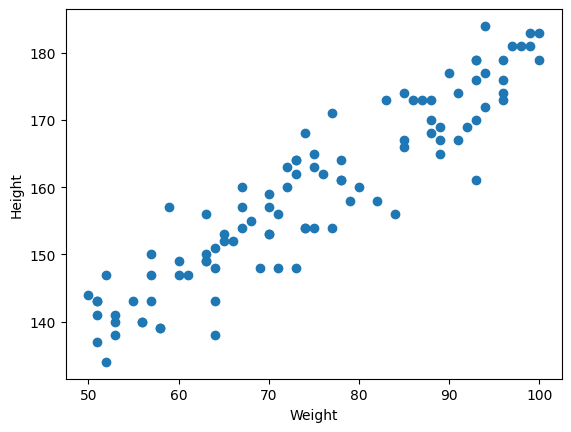

In [50]:
## scatter plot

plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [51]:
## Correlation

df.corr()

,Weight,Height
Weight,1.000000,0.927846
Height,0.927846,1.000000


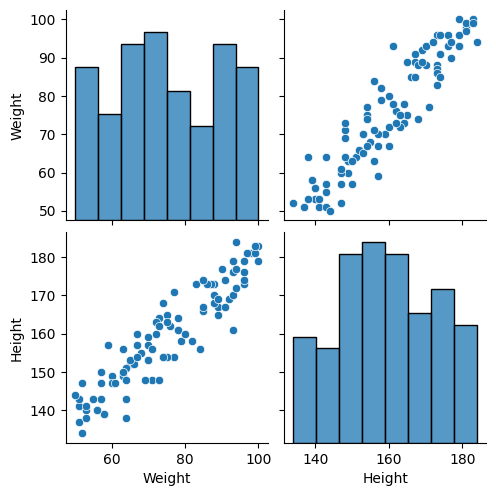

In [52]:
## seaborn for visualization

import seaborn as sns
sns.pairplot(df)
plt.show()

In [ ]:
X = df['Weight'] ## this is a 1D array
np.array(X).shape ## we have to escape from this situation always make independent feature a 2D array like below

(100,)

In [55]:
## Independent and Dependent features

X = df[['Weight']] ## always remember our independent feature is a 2D array or dataframe
np.array(X).shape
X.head()

,Weight
0,88
1,78
2,64
3,92
4,57


In [ ]:
y = df['Height'] ## this is a 1D array and dependent feature should be a 1D array or in series
np.array(y).shape ## this is a 1D array
y.head()

0    170
1    161
2    143
3    169
4    150
Name: Height, dtype: int64

In [61]:
## Train Test Split
from sklearn.model_selection import train_test_split



In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [64]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((75, 1), (25, 1), (75,), (25,))

In [ ]:
## Standardization (Suppose there are multiple features and we want to standardize all of them and then we can apply z-score
# z-score = (xi - mean)/std , where mean = 0 and std = 1 for the standardized data) 
# StandardScaler is used to standardize the data

from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) ## fit_transform is used to fit the data and transform it into standardized data

array([[-1.50453012],
       [ 1.73682741],
       [ 0.25120521],
       [-0.96430387],
       [-0.49160589],
       [-0.0864362 ],
       [-0.01890792],
       [ 0.99401631],
       [-0.01890792],
       [-0.01890792],
       [-0.28902105],
       [-1.43700184],
       [ 0.99401631],
       [ 1.46671429],
       [-0.22149277],
       [ 1.66929913],
       [-0.69419074],
       [-0.42407761],
       [ 1.06154459],
       [ 1.26412944],
       [ 1.26412944],
       [-0.69419074],
       [-0.89677559],
       [-0.55913418],
       [ 0.99401631],
       [ 0.52131834],
       [ 1.19660116],
       [-1.57205841],
       [-1.50453012],
       [-0.15396448],
       [-0.76171902],
       [ 0.92648803],
       [ 1.66929913],
       [ 1.73682741],
       [-0.49160589],
       [-1.234417  ],
       [-1.63958669],
       [ 0.18367693],
       [-1.09936043],
       [-1.09936043],
       [-1.57205841],
       [-1.43700184],
       [-1.30194528],
       [-0.76171902],
       [-0.69419074],
       [ 0

In [67]:
X_test = scaler.transform(X_test) ## transform is used to transform the data into standardized data

In [68]:
X_test

array([[-0.76171902],
       [-0.35654933],
       [-1.43700184],
       [-0.49160589],
       [ 0.92648803],
       [ 0.79143147],
       [-1.57205841],
       [ 1.53424257],
       [-0.96430387],
       [ 0.92648803],
       [-0.0864362 ],
       [ 0.11614865],
       [ 0.04862036],
       [-0.62666246],
       [ 1.46671429],
       [-1.16688871],
       [-1.03183215],
       [ 0.72390318],
       [ 0.72390318],
       [ 1.12907288],
       [ 1.46671429],
       [ 1.33165772],
       [-0.22149277],
       [-0.28902105],
       [ 1.12907288]])

In [70]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [73]:
regression = LinearRegression(n_jobs=-1) ## n_jobs = -1 means use all the processors available

In [74]:
regression.fit(X_train,y_train) ## fit the model on the training data

LinearRegression(n_jobs=-1)

In [80]:
print("Coefficient or Slope of the line:",regression.coef_) ## this is the slope of the line ( y = b0 + b1*x1 here b1 is the slope of the line = regression.coef_ )
print("Intercept of the line:",regression.intercept_) ## this is the intercept of the line ( y = b0 + b1*x1 here b0 is the intercept of the line = regression.intercept_ )

Coefficient or Slope of the line: [0.82372111]
Intercept of the line: 97.44066235709758


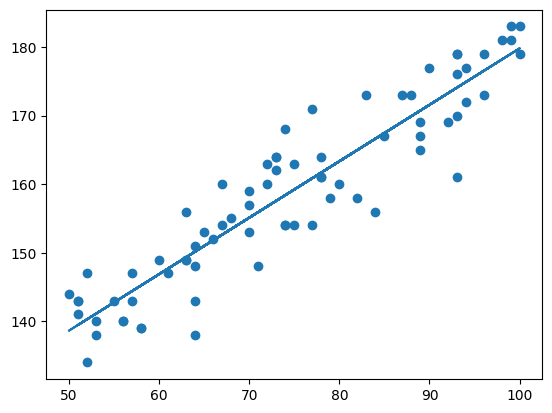

In [86]:
## plot training data plot best fit line
plt.scatter(X_train,y_train) ## scatter plot of training data
plt.plot(X_train,regression.predict(X_train)) ## plot the best fit line
plt.show()

In [87]:
## Prediction for test data

y_pred = regression.predict(X_test) ## predict the test data

/home/mukulvyas/.config/jupyterlab-desktop/jlab_server/envs/protfeat_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [88]:
## Performance Metric

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [89]:
mse = mean_squared_error(y_test,y_pred) ## mean squared error
mae = mean_absolute_error(y_test,y_pred) ## mean absolute error 
rmse = np.sqrt(mse) ## root mean squared error
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 4191.990993138511
Mean Absolute Error: 63.65031367842202
Root Mean Squared Error: 64.74558666919708


### R Squared
#### R squared is the proportion of the variance in the dependent variable that is predictable from the  independent variable(s).
#### R ^ 2 = 1 - (SS_res / SS_tot)
#### SS_res = sum of squares of residuals
#### SS_tot = total sum of squares

In [90]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred) ## r2 score 
print("R2 Score:",score) ## r2 score

R2 Score: -25.42455240253726


#### Adjusted R2 Score
#### Adjusted R2 Score = 1 - (1-R2)*(n-1)/(n-k-1) 
#### where n = number of observations and k = number of features

In [93]:
#display adjusted r2 score
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) ## adjusted r2 score

-26.57344598525627

In [96]:
## OLS Linear Regression

import statsmodels.api as sm

In [99]:
model = sm.OLS(y_train,X_train).fit() ## OLS is used to fit the model

In [100]:
predictions = model.predict(X_test) ## predict the test data
print(predictions) ## summary of the model

[-1.5884724  -0.74354027 -2.99669262 -1.02518432  1.93207813  1.65043409
 -3.27833666  3.19947633 -2.01093847  1.93207813 -0.18025219  0.24221388
  0.10139186 -1.30682836  3.05865431 -2.43340453 -2.15176049  1.50961207
  1.50961207  2.3545442   3.05865431  2.77701026 -0.46189623 -0.60271825
  2.3545442 ]


In [101]:
print(model.summary()) ## summary of the model

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              4767.
Date:                Mon, 12 May 2025   Prob (F-statistic):                    6.13e-69
Time:                        16:18:18   Log-Likelihood:                         -329.89
No. Observations:                  75   AIC:                                      661.8
Df Residuals:                      74   BIC:                                      664.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [102]:
## Prediction for new data

new_data = [[70]] ## new data for prediction
regression.predict(scaler.transform(new_data)) ## predict the new data

/home/mukulvyas/.config/jupyterlab-desktop/jlab_server/envs/protfeat_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/mukulvyas/.config/jupyterlab-desktop/jlab_server/envs/protfeat_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([97.20258962])